In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import tensorflow as tf
from tensorflow.keras import layers
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, f1_score
import warnings
from sklearn.ensemble import BaggingClassifier
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("datafile_mini_project.csv")
data

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,b6cd78eb-05e3-4cf0-a408-28520a885266,34c26035-9668-432c-852c-f203e2f42dfe,Fully Paid,218086,Short Term,743.0,1261923.0,10+ years,Home Mortgage,Debt Consolidation,16930.90,19.8,NaN,10,0,706230,1057870,0.0,0.0
29995,3d273d59-e798-47ac-ab22-4574bae72e2d,78480189-7219-453c-b938-88fcf52412b2,Fully Paid,366212,Short Term,734.0,717516.0,10+ years,Home Mortgage,Debt Consolidation,19672.03,22.4,NaN,9,0,478268,922966,0.0,0.0
29996,06755a13-2b7c-4edd-97cf-8588f4dd7413,407dc794-7c18-42de-87ba-dfb7a49d24b3,Fully Paid,249436,Long Term,730.0,678623.0,7 years,Home Mortgage,Debt Consolidation,13233.12,17.6,74.0,14,0,89091,379236,0.0,0.0
29997,6a3a6d20-19b9-4962-8752-00fcc54c9c95,c943663f-96e5-47b0-8e5a-b10a1cd35edf,Fully Paid,99999999,Short Term,737.0,671270.0,NaN,Home Mortgage,Debt Consolidation,6936.52,20.6,NaN,12,0,151278,263406,0.0,0.0


In [3]:
data=data[:20000]
data

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,b86ac9e3-bf85-42df-aaae-eae58d84fdee,a7cab8da-8df9-4b47-9711-0c69e763cad2,Fully Paid,89100,Short Term,703.0,1077414.0,8 years,Rent,Medical Bills,15173.59,19.9,27.0,10,0,272688,362912,0.0,0.0
19996,899c9abd-a5eb-4a20-b62c-dc6399a7206c,425012ea-084c-4cab-96b3-e9057d55ad76,Charged Off,676368,Long Term,6240.0,1460340.0,10+ years,Own Home,Business Loan,6097.10,36.0,NaN,2,0,317243,585860,0.0,0.0
19997,52e0b873-6394-46e0-9943-54621e1939c6,d7b21e67-904b-458e-bcb7-63b7db2bd4fe,Fully Paid,550418,Long Term,675.0,1134072.0,3 years,Home Mortgage,Debt Consolidation,13325.27,29.4,26.0,5,0,77634,102850,0.0,0.0
19998,97ffbb23-b223-4771-a6e2-c86db23a0147,b2a2532e-1419-4bb3-8634-d2a4d31ef323,Fully Paid,91124,Short Term,709.0,1349266.0,2 years,Rent,Debt Consolidation,26422.92,11.0,74.0,14,0,69787,340956,0.0,0.0


In [4]:
data[list(data.columns)].isnull().sum()


Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                     3860
Annual Income                    3860
Years in current job              864
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    10728
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                       44
Tax Liens                           3
dtype: int64

In [5]:
data.drop(labels=['Months since last delinquent'], axis=1, inplace=True)
data.shape

(20000, 18)

In [6]:
data.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)
data.drop(data.tail(514).index, inplace=True)
data.shape

(19486, 16)

In [7]:
data[list(data.columns)].isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                 3764
Annual Income                3764
Years in current job          836
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                   42
Tax Liens                       3
dtype: int64

In [8]:
for i in data['Maximum Open Credit'][data['Maximum Open Credit'].isnull() == True].index:
    data.drop(labels=i, inplace=True)
for i in data['Tax Liens'][data['Tax Liens'].isnull() == True].index:
    data.drop(labels=i, inplace=True)

In [9]:
data.shape

(19483, 16)

In [10]:
data[list(data.columns)].isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                 3764
Annual Income                3764
Years in current job          836
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                   39
Tax Liens                       0
dtype: int64

In [11]:
data['Credit Score'].fillna(value=data['Credit Score'].mean(), inplace=True)
data['Annual Income'].fillna(value=data['Annual Income'].mean(), inplace=True)
data['Bankruptcies'].fillna(value=data['Bankruptcies'].mean(), inplace=True)

In [12]:
data[list(data.columns)].isnull().sum()

Loan Status                    0
Current Loan Amount            0
Term                           0
Credit Score                   0
Annual Income                  0
Years in current job         836
Home Ownership                 0
Purpose                        0
Monthly Debt                   0
Years of Credit History        0
Number of Open Accounts        0
Number of Credit Problems      0
Current Credit Balance         0
Maximum Open Credit            0
Bankruptcies                   0
Tax Liens                      0
dtype: int64

In [13]:
data['Years in current job'].unique()

array(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year', nan,
       '6 years'], dtype=object)

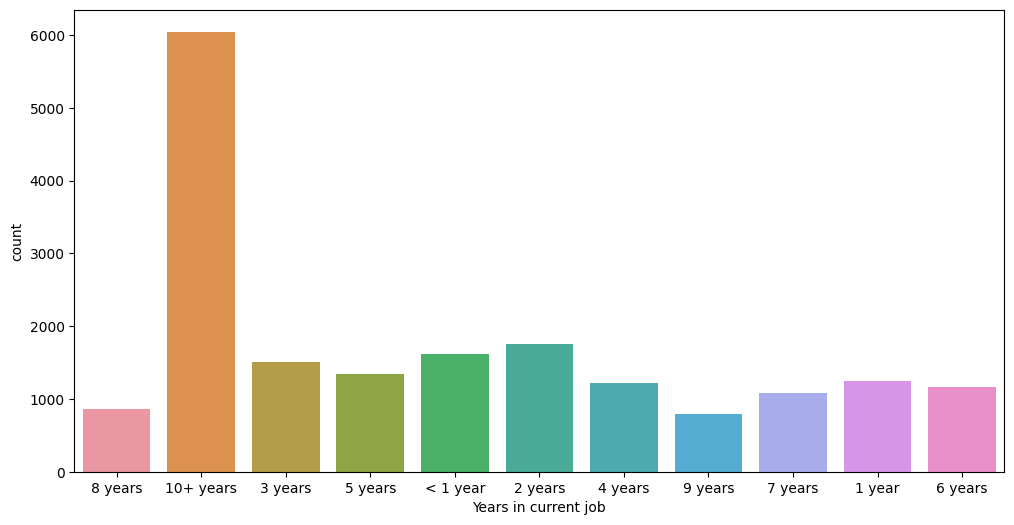

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Years in current job',data=data)
plt.show()

In [15]:
data.fillna('10+ years', inplace=True)
data[list(data.columns)].isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

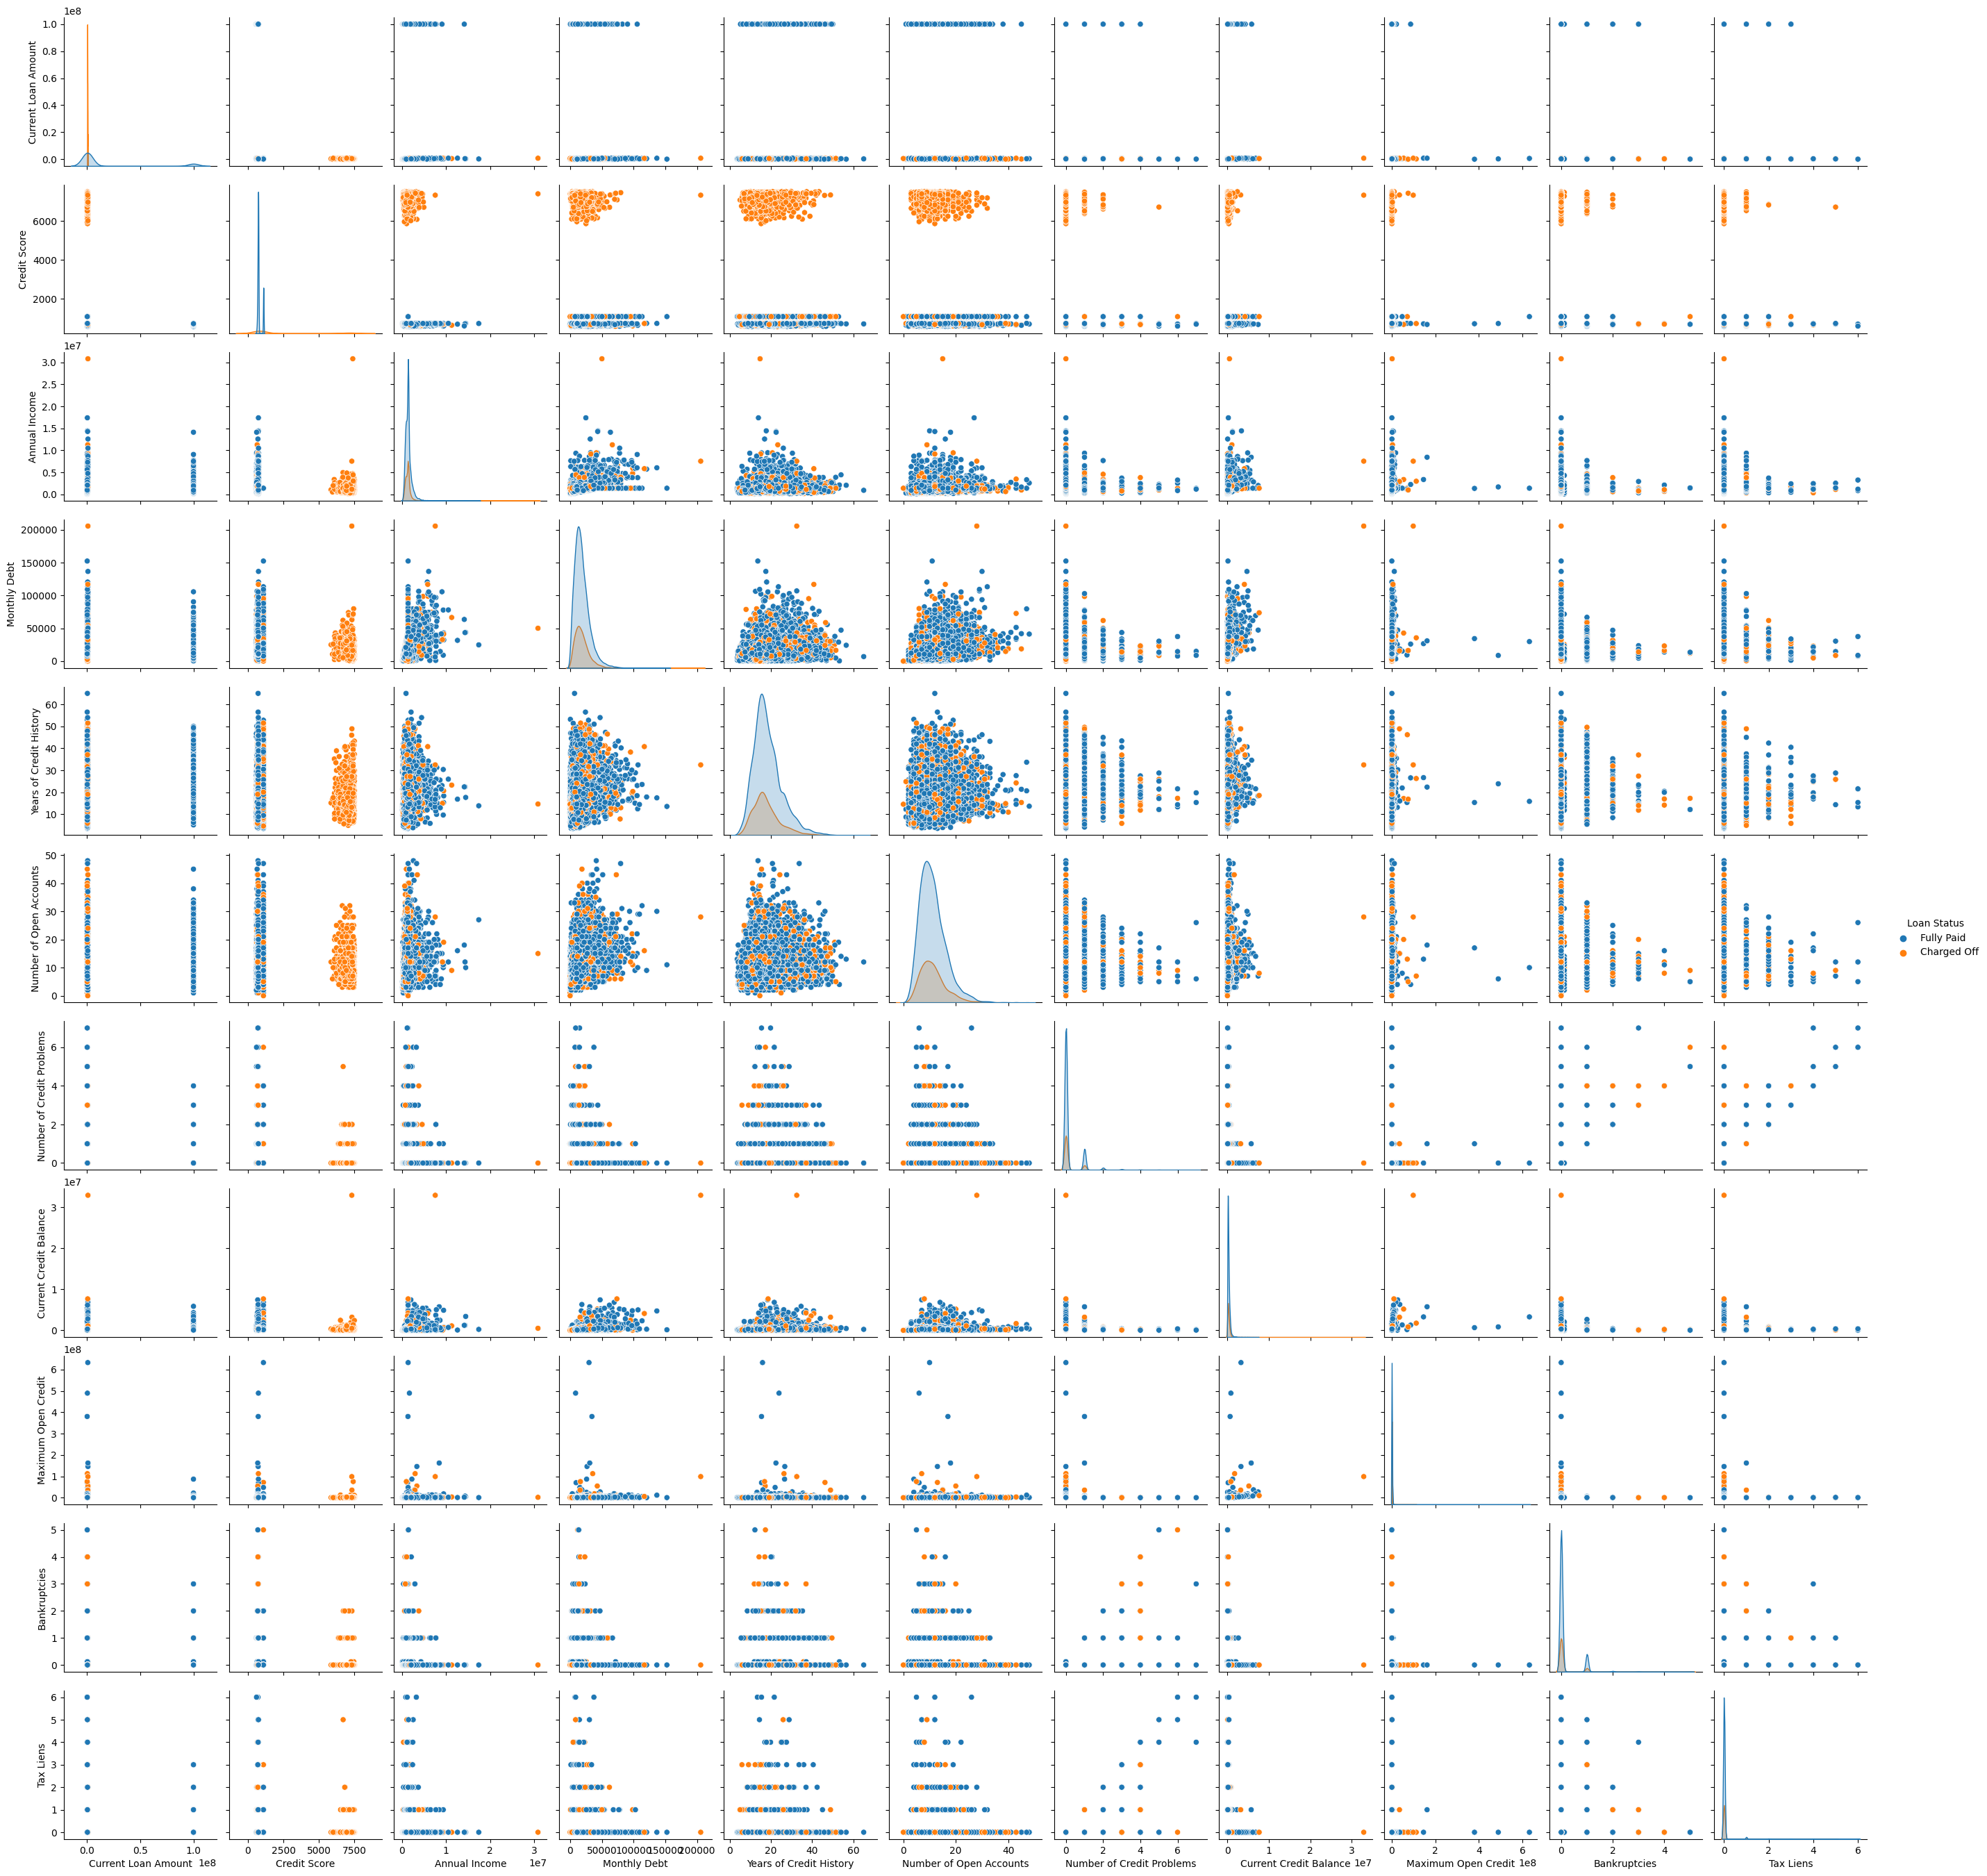

In [16]:
sns.pairplot(data,hue="Loan Status")

In [17]:
bi_pkl=pd.get_dummies(data['Loan Status'], drop_first=True)
con_pkl=pd.concat([data,bi_pkl],axis=1)
con_pkl.shape


(19483, 17)

In [18]:
data=con_pkl
data.drop(['Loan Status'],axis=1, inplace=True)
data.shape

(19483, 16)

In [19]:
data.head(10)

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Fully Paid
0,445412,Short Term,709.000000,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6,1,228190,416746,1.0,0.0,1
1,262328,Short Term,1094.443285,1.376811e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35,0,229976,850784,0.0,0.0,1
2,99999999,Short Term,741.000000,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090,0.0,0.0,1
3,347666,Long Term,721.000000,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,9,0,256329,386958,0.0,0.0,1
4,176220,Short Term,1094.443285,1.376811e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,15,0,253460,427174,0.0,0.0,1
5,206602,Short Term,7290.000000,8.968570e+05,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6,0,215308,272448,0.0,0.0,0
6,217646,Short Term,730.000000,1.184194e+06,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,13,1,122170,272052,1.0,0.0,1
7,648714,Long Term,1094.443285,1.376811e+06,< 1 year,Home Mortgage,Buy House,14806.13,8.2,15,0,193306,864204,0.0,0.0,0
8,548746,Short Term,678.000000,2.559110e+06,2 years,Rent,Debt Consolidation,18660.28,22.6,4,0,437171,555038,0.0,0.0,1
9,215952,Short Term,739.000000,1.454735e+06,< 1 year,Rent,Debt Consolidation,39277.75,13.9,20,0,669560,1021460,0.0,0.0,1


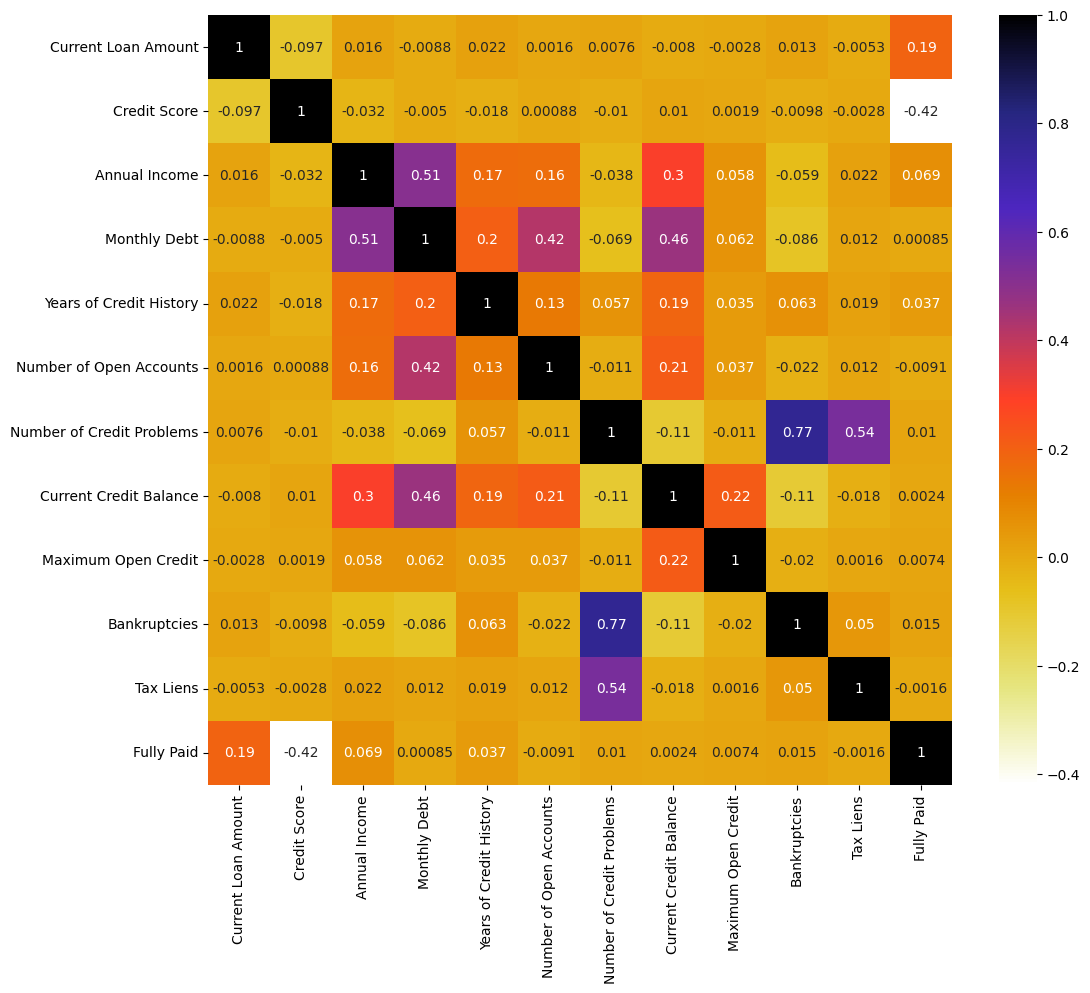

In [20]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [21]:
data

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Fully Paid
0,445412,Short Term,709.000000,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6,1,228190,416746,1.0,0.0,1
1,262328,Short Term,1094.443285,1.376811e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35,0,229976,850784,0.0,0.0,1
2,99999999,Short Term,741.000000,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090,0.0,0.0,1
3,347666,Long Term,721.000000,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,9,0,256329,386958,0.0,0.0,1
4,176220,Short Term,1094.443285,1.376811e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,15,0,253460,427174,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19481,615208,Short Term,743.000000,4.743825e+06,10+ years,Home Mortgage,Debt Consolidation,86970.03,27.7,16,0,2807896,4048858,0.0,0.0,1
19482,114664,Short Term,742.000000,1.714104e+06,5 years,Rent,Debt Consolidation,10613.21,14.7,8,0,221768,904156,0.0,0.0,1
19483,586586,Long Term,691.000000,1.778685e+06,10+ years,Home Mortgage,Debt Consolidation,32564.67,19.1,12,0,293816,588588,0.0,0.0,0
19484,79464,Short Term,739.000000,9.532300e+05,1 year,Home Mortgage,Debt Consolidation,11200.50,45.8,20,1,72105,482570,1.0,0.0,1


In [22]:
categorical_subset = data[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]
categorical_subset = pd.get_dummies(categorical_subset)
categorical_subset.head()

,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
data.drop(labels=['Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis=1, inplace=True)


In [24]:
data = pd.concat([data, categorical_subset], axis = 1)

In [25]:
data.drop(labels=['Number of Credit Problems'], axis=1, inplace=True)

In [26]:
data.shape

(19483, 44)

In [27]:
data

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,445412,709.000000,1.167493e+06,5214.74,17.2,6,228190,416746,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,262328,1094.443285,1.376811e+06,33295.98,21.1,35,229976,850784,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,99999999,741.000000,2.231892e+06,29200.53,14.9,18,297996,750090,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,347666,721.000000,8.069490e+05,8741.90,12.0,9,256329,386958,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,176220,1094.443285,1.376811e+06,20639.70,6.1,15,253460,427174,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19481,615208,743.000000,4.743825e+06,86970.03,27.7,16,2807896,4048858,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
19482,114664,742.000000,1.714104e+06,10613.21,14.7,8,221768,904156,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
19483,586586,691.000000,1.778685e+06,32564.67,19.1,12,293816,588588,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
19484,79464,739.000000,9.532300e+05,11200.50,45.8,20,72105,482570,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X = data.drop(columns='Fully Paid')
Y = pd.DataFrame(data['Fully Paid'])

In [29]:
print(np.sum(Y == 1))
print(np.sum(Y == 0))

Fully Paid    15052
dtype: int64
Fully Paid    4431
dtype: int64


In [30]:
#!pip install imbalanced-learn
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE()
X, Y = oversample.fit_resample(X, Y)

In [31]:
print(np.sum(Y == 1))
print(np.sum(Y == 0))

Fully Paid    15052
dtype: int64
Fully Paid    15052
dtype: int64


In [32]:
len(X)

30104

In [33]:
means = X.mean()
stds = X.std()

# Convert means and standard deviations to lists
mean_list = means.tolist()
std_list = stds.tolist()

Spliting into Train and test

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1,stratify=Y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(24083, 43) (6021, 43) (24083, 1) (6021, 1)


In [35]:
x_train

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
21431,412291,700.111291,1.700222e+06,15218.882436,11.206585,6,55024,216176,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
29175,408320,7267.117533,8.909318e+05,23582.674241,23.562787,15,513868,1138974,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4216,88770,1094.443285,1.376811e+06,8082.220000,16.000000,11,335236,982696,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
11398,218768,1094.443285,1.376811e+06,18011.810000,22.000000,18,202559,1310298,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7581,99999999,719.000000,1.077718e+06,26853.270000,17.300000,8,221597,706816,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28555,288102,731.372778,2.172412e+06,29812.109719,14.321725,15,410022,692713,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
13826,78694,742.000000,1.258294e+06,26424.060000,16.100000,5,75677,119218,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
25851,199070,3400.836479,1.721254e+06,29099.849530,12.864517,12,151710,277643,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
25828,278218,692.427559,1.102305e+06,13828.599090,24.160395,11,140035,243940,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
list(x_train.columns)

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Monthly Debt',
 'Years of Credit History',
 'Number of Open Accounts',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens',
 'Term_Long Term',
 'Term_Short Term',
 'Years in current job_1 year',
 'Years in current job_10+ years',
 'Years in current job_2 years',
 'Years in current job_3 years',
 'Years in current job_4 years',
 'Years in current job_5 years',
 'Years in current job_6 years',
 'Years in current job_7 years',
 'Years in current job_8 years',
 'Years in current job_9 years',
 'Years in current job_< 1 year',
 'Home Ownership_HaveMortgage',
 'Home Ownership_Home Mortgage',
 'Home Ownership_Own Home',
 'Home Ownership_Rent',
 'Purpose_Business Loan',
 'Purpose_Buy House',
 'Purpose_Buy a Car',
 'Purpose_Debt Consolidation',
 'Purpose_Educational Expenses',
 'Purpose_Home Improvements',
 'Purpose_Medical Bills',
 'Purpose_Other',
 'Purpose_Take a Trip',
 'Purpose_major_purchase',
 'Purp

In [37]:
x_train.shape

(24083, 43)

In [38]:
y_train

,Fully Paid
21431,0
29175,0
4216,0
11398,1
7581,1
...,...
28555,0
13826,1
25851,0
25828,0


In [39]:
x_test

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
10561,177804,742.000000,8.638160e+05,14036.820000,19.000000,9,529549,806806,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
25513,344089,1094.443285,1.376811e+06,19260.612709,22.986528,15,355398,586097,0.478204,0.0,...,0,0,0,0,0,0,0,0,0,0
4806,201872,1094.443285,1.376811e+06,4632.770000,3.600000,13,165737,1048652,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
9792,131230,705.000000,8.877370e+05,11392.590000,33.400000,10,62282,366014,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
11542,99999999,725.000000,2.139628e+06,34055.790000,31.200000,16,956612,1903198,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21696,177205,1031.063458,1.189302e+06,18982.114657,19.653666,9,233315,413027,0.049912,0.0,...,0,0,0,0,0,0,0,0,0,0
28774,758133,6433.860597,4.871606e+06,20766.655432,20.120254,10,157792,845930,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
19360,215116,1094.443285,1.376811e+06,14088.500000,10.800000,14,419311,541882,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
5694,111738,743.000000,6.947350e+05,712.120000,17.700000,3,35017,67034,0.000000,0.0,...,0,0,0,1,0,0,0,0,0,0


In [40]:
print(np.sum(y_train == 1))
print(np.sum(y_train == 0))

Fully Paid    12041
dtype: int64
Fully Paid    12042
dtype: int64


Normalization

In [41]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [42]:
x_train

array([[-0.2764983 , -0.43917413,  0.48226352, ..., -0.04179731,
        -0.0302381 , -0.01822896],
       [-0.27665159,  3.33962626, -0.57081267, ..., -0.04179731,
        -0.0302381 , -0.01822896],
       [-0.28898715, -0.21226679,  0.0614294 , ..., -0.04179731,
        -0.0302381 , -0.01822896],
       ...,
       [-0.28472925,  1.11488278,  0.50962991, ..., -0.04179731,
        -0.0302381 , -0.01822896],
       [-0.28167391, -0.44359552, -0.29576713, ..., -0.04179731,
        -0.0302381 , -0.01822896],
       [-0.28575323, -0.41989377, -0.85693596, ..., -0.04179731,
        -0.0302381 , -0.01822896]])

In [43]:
x_train.shape

(24083, 43)

In [44]:
y_train

,Fully Paid
21431,0
29175,0
4216,0
11398,1
7581,1
...,...
28555,0
13826,1
25851,0
25828,0


In [45]:
x_test

array([[-0.28555018, -0.41507044, -0.60609673, ..., -0.04179731,
        -0.0302381 , -0.01822896],
       [-0.2791311 , -0.21226679,  0.0614294 , ..., -0.04179731,
        -0.0302381 , -0.01822896],
       [-0.28462108, -0.21226679,  0.0614294 , ..., -0.04179731,
        -0.0302381 , -0.01822896],
       ...,
       [-0.28410983, -0.21226679,  0.0614294 , ..., -0.04179731,
        -0.0302381 , -0.01822896],
       [-0.28810052, -0.41449502, -0.82611062, ..., -0.04179731,
        -0.0302381 , -0.01822896],
       [-0.28238497, -0.4323331 ,  0.16764807, ..., -0.04179731,
        -0.0302381 , -0.01822896]])

In [46]:
x_test.shape

(6021, 43)

In [47]:
y_test

,Fully Paid
10561,1
25513,0
4806,1
9792,1
11542,1
...,...
21696,0
28774,0
19360,0
5694,1


In [48]:
x_train[0]

array([-0.2764983 , -0.43917413,  0.48226352, -0.26694575, -1.028992  ,
       -1.04586453, -0.53627198, -0.08843744, -0.35053572, -0.12890102,
       -0.58267247, -1.2913519 , -0.21265872, -0.61159747, -0.25827322,
       -0.23259193, -0.2096547 , -0.21877263, -0.20320418, -0.19440152,
       -0.1761778 , -0.16549293, -0.24416816, -0.03815   ,  1.26376813,
       -0.24918832, -0.75657646, -0.09841099, -0.06742842, -0.0928846 ,
       -1.69484145, -0.03287501, -0.19782647, -0.0843155 , -0.14381359,
       -0.06424758, -0.04696356, -0.02578392, -0.20705104, -0.00911334,
       -0.04179731, -0.0302381 , -0.01822896])

Base Model Logistic Regression and It's Results

In [49]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred=lr.predict(x_test)
print("score using logistic regression(base model) " ,lr.score(x_test, y_test))
print(classification_report(y_test,pred ))
print('ROC-AUC-Score' , roc_auc_score(y_test,pred))

score using logistic regression(base model)  0.8764324862979571
              precision    recall  f1-score   support

           0       1.00      0.76      0.86      3010
           1       0.80      1.00      0.89      3011

    accuracy                           0.88      6021
   macro avg       0.90      0.88      0.87      6021
weighted avg       0.90      0.88      0.87      6021

ROC-AUC-Score 0.8764124014824933


In [50]:
cf_matrix= confusion_matrix(y_test, pred)
# (tn, fp, fn, tp)
cf_matrix

array([[2274,  736],
       [   8, 3003]], dtype=int64)

Logistic Regression Confusion Matrix

<Axes: >

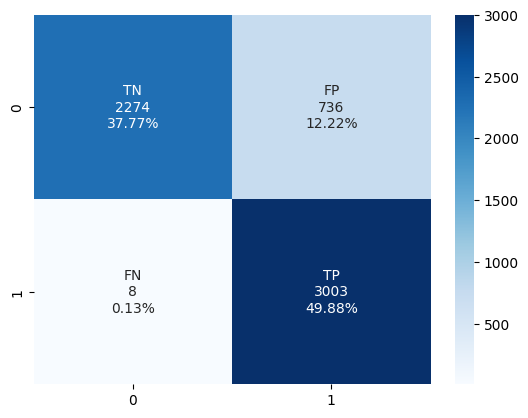

In [51]:
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Random forest classifier

In [52]:
rfc=RandomForestClassifier(criterion='gini',max_depth=None,max_features='log2',n_estimators=500)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print("score for RF classifier using hyperparameter ",rfc.score(x_test,y_test))
print(classification_report(y_test,y_pred))
print('ROC-AUC-Score' , roc_auc_score(y_test,y_pred))

score for RF classifier using hyperparameter  0.885401096163428
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      3010
           1       0.83      0.98      0.90      3011

    accuracy                           0.89      6021
   macro avg       0.90      0.89      0.88      6021
weighted avg       0.90      0.89      0.88      6021

ROC-AUC-Score 0.8853857009348889


In [53]:
cf_matrix= confusion_matrix(y_test, y_pred)
# (tn, fp, fn, tp)
cf_matrix

array([[2386,  624],
       [  66, 2945]], dtype=int64)

Random Forest Classifier Confucion Matrix

<Axes: >

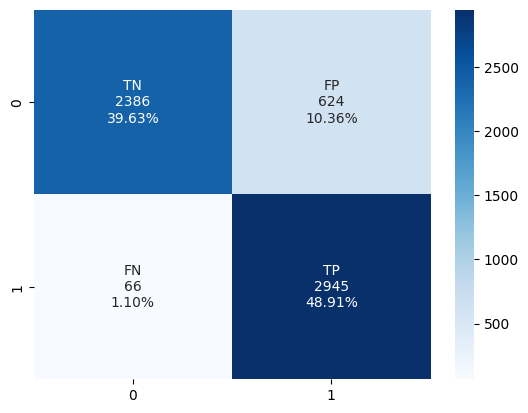

In [54]:
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [55]:
from sklearn import svm

In [56]:
clf = svm.SVC()

In [57]:
clf.fit(x_train,y_train)

SVC()

In [58]:
y_pred2=clf.predict(x_test)

In [59]:
print("score for SVM classifier ",clf.score(x_test,y_test))

score for SVM classifier  0.8734429496761336


In [60]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86      3010
           1       0.80      1.00      0.89      3011

    accuracy                           0.87      6021
   macro avg       0.90      0.87      0.87      6021
weighted avg       0.90      0.87      0.87      6021



In [61]:
print('ROC-AUC-Score' , roc_auc_score(y_test,y_pred2))

ROC-AUC-Score 0.8734224234286023


In [62]:
cf_matrix2= confusion_matrix(y_test, y_pred2)
# (tn, fp, fn, tp)
cf_matrix2

array([[2257,  753],
       [   9, 3002]], dtype=int64)

<Axes: >

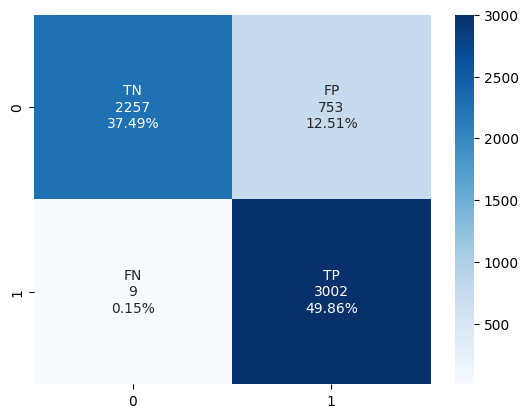

In [63]:
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix2.flatten()/np.sum(cf_matrix2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix2, annot=labels, fmt='', cmap='Blues')

In [64]:
estimator = []
estimator.append(('LR',
                  LogisticRegression(solver ='lbfgs',
                                     multi_class ='multinomial',
                                     max_iter = 200)))
estimator.append(('SVC', svm.SVC(gamma ='auto', probability = True)))
estimator.append(('RFC', RandomForestClassifier()))

In [65]:
from sklearn.ensemble import VotingClassifier

In [66]:
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')

In [67]:
vot_soft.fit(x_train, y_train)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(max_iter=200,
                                                 multi_class='multinomial')),
                             ('SVC', SVC(gamma='auto', probability=True)),
                             ('RFC', RandomForestClassifier())],
                 voting='soft')

In [68]:
y_pred = vot_soft.predict(x_test)

In [69]:
cf_matrix= confusion_matrix(y_test, y_pred)
# (tn, fp, fn, tp)
cf_matrix

array([[2279,  731],
       [  14, 2997]], dtype=int64)

<Axes: >

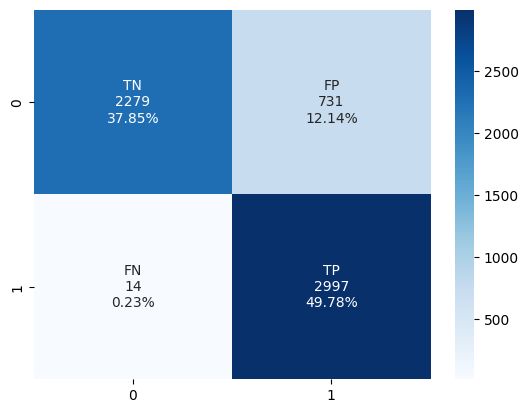

In [70]:
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [71]:
import pickle

In [72]:
pickle.dump(vot_soft,open('softvoting.pkl','wb'))

In [73]:
pickle.dump(clf,open('SVMmodel.pkl','wb'))

In [74]:
pickle.dump(rfc,open('randomforest.pkl','wb'))

In [75]:
pickle.dump(lr,open('logisticregression.pkl','wb'))

In [76]:
pd.to_pickle(mean_list, "means.pkl")
pd.to_pickle(std_list, "stds.pkl")

In [77]:
x_train

array([[-0.2764983 , -0.43917413,  0.48226352, ..., -0.04179731,
        -0.0302381 , -0.01822896],
       [-0.27665159,  3.33962626, -0.57081267, ..., -0.04179731,
        -0.0302381 , -0.01822896],
       [-0.28898715, -0.21226679,  0.0614294 , ..., -0.04179731,
        -0.0302381 , -0.01822896],
       ...,
       [-0.28472925,  1.11488278,  0.50962991, ..., -0.04179731,
        -0.0302381 , -0.01822896],
       [-0.28167391, -0.44359552, -0.29576713, ..., -0.04179731,
        -0.0302381 , -0.01822896],
       [-0.28575323, -0.41989377, -0.85693596, ..., -0.04179731,
        -0.0302381 , -0.01822896]])

In [78]:
y_train

,Fully Paid
21431,0
29175,0
4216,0
11398,1
7581,1
...,...
28555,0
13826,1
25851,0
25828,0
